In [2]:
import pandas as pd
import numpy as np

In [28]:
Prod2 = pd.read_csv("ProdL2_202301121041.csv", sep = ";")
Prod2

,data,presion_baja_pol_puro,presion_alta_pol_mix,presion_media_pol_mix,presion_baja_pol_mix,presion_alta_iso,presion_baja_iso,presion_media_cat1,presion_baja_cat1,presion_alta_pent,...,temp_pol,temp_iso,temp_cat1,temp_aditivo,temp_pent,nivel_pol1,nivel_pol2,nivel_iso,nivel_cat1,nivel_aditivo
0,2022-10-24 14:19:10.000,0.1,5.3,5.5,-3276.7,0.2,0.0,1.5,1.8,4.6,...,0.0,0.0,0.0,0.0,0.0,81.6,79.3,87.1,61.4,66.6
1,2022-10-24 14:19:15.000,0.1,5.3,5.5,-3276.7,0.2,0.0,1.5,1.8,4.5,...,0.0,0.0,0.0,0.0,0.0,81.6,79.3,87.1,61.4,66.6
2,2022-10-24 14:19:20.000,0.1,5.3,5.5,-3276.7,0.2,0.0,1.5,1.8,4.4,...,0.0,0.0,0.0,0.0,0.0,81.6,79.3,87.0,61.3,66.6
3,2022-10-24 14:19:26.000,0.1,5.3,5.5,-3276.7,0.2,0.0,1.5,1.8,4.5,...,0.0,0.0,0.0,0.0,0.0,81.7,79.3,87.1,61.3,66.6
4,2022-10-24 14:19:31.000,0.1,5.3,5.6,-3276.7,0.2,0.0,1.5,1.8,4.5,...,0.0,0.0,0.0,0.0,0.0,81.6,79.4,87.1,61.3,66.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312726,2023-01-12 10:51:03.000,9.7,146.2,6.6,-3276.7,139.7,6.3,29.9,1.8,125.6,...,0.0,0.0,0.0,0.0,0.0,65.2,68.7,78.8,70.9,64.4
1312727,2023-01-12 10:51:08.000,9.7,147.9,6.6,-3276.7,139.9,6.6,44.0,1.8,124.4,...,0.0,0.0,0.0,0.0,0.0,65.6,68.7,78.6,70.9,64.5
1312728,2023-01-12 10:51:13.000,9.8,147.7,6.6,-3276.7,140.0,6.4,25.0,1.8,125.6,...,0.0,0.0,0.0,0.0,0.0,66.1,68.7,78.4,70.7,64.4
1312729,2023-01-12 10:51:18.000,9.8,148.4,6.6,-3276.7,139.8,6.6,48.2,1.8,126.7,...,0.0,0.0,0.0,0.0,0.0,66.5,68.7,78.2,70.7,64.4


Se elimina de los datos columnas que tengan datos no relevantes o no tratables por el algoritmo, como por ejemplo fechas.

In [29]:
Prod2 = Prod2.drop(columns = 'data', axis = 1)

Se comprueba si hay más variables que tengan el mismo valor siempre o sean categóricas

In [30]:
for i in range(0,len(Prod2.loc[0])):
    print(i,": ",len(Prod2.iloc[:,i].unique()))

0 :  160
1 :  1613
2 :  103
3 :  1
4 :  1506
5 :  194
6 :  665
7 :  24
8 :  1743
9 :  88
10 :  16
11 :  522
12 :  335
13 :  547
14 :  446
15 :  120
16 :  998
17 :  1
18 :  1
19 :  1
20 :  1
21 :  1
22 :  893
23 :  921
24 :  859
25 :  805
26 :  127


Se observa que las siguientes columnas tienen un unico valor o son categoricos: 5, 6, 21, 22, 33, 39, 44-78. Se procedió a eliminar dichas columnas.

In [31]:
columns = [3,17,18,19,20,21]
Prod2 = Prod2.drop(columns=Prod2.columns[columns], axis = 1)
Prod2

,presion_baja_pol_puro,presion_alta_pol_mix,presion_media_pol_mix,presion_alta_iso,presion_baja_iso,presion_media_cat1,presion_baja_cat1,presion_alta_pent,presion_baja_pent,presion_baja_aditivo,...,caudal_pol_mix,caudal_iso,caudal_cat1,caudal_aditivo,caudal_pent,nivel_pol1,nivel_pol2,nivel_iso,nivel_cat1,nivel_aditivo
0,0.1,5.3,5.5,0.2,0.0,1.5,1.8,4.6,4.4,1.5,...,0.029,0.000,0.015,0.001,0.001,81.6,79.3,87.1,61.4,66.6
1,0.1,5.3,5.5,0.2,0.0,1.5,1.8,4.5,4.4,1.5,...,0.029,0.000,0.016,0.001,0.001,81.6,79.3,87.1,61.4,66.6
2,0.1,5.3,5.5,0.2,0.0,1.5,1.8,4.4,4.6,1.5,...,0.029,0.000,0.015,0.001,0.000,81.6,79.3,87.0,61.3,66.6
3,0.1,5.3,5.5,0.2,0.0,1.5,1.8,4.5,4.6,1.5,...,0.058,0.000,0.015,0.001,0.000,81.7,79.3,87.1,61.3,66.6
4,0.1,5.3,5.6,0.2,0.0,1.5,1.8,4.5,4.1,1.5,...,0.029,0.000,0.015,0.001,0.001,81.6,79.4,87.1,61.3,66.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312726,9.7,146.2,6.6,139.7,6.3,29.9,1.8,125.6,3.4,1.5,...,4.110,5.991,0.124,0.000,0.275,65.2,68.7,78.8,70.9,64.4
1312727,9.7,147.9,6.6,139.9,6.6,44.0,1.8,124.4,4.6,1.5,...,4.110,5.991,0.119,0.000,0.275,65.6,68.7,78.6,70.9,64.5
1312728,9.8,147.7,6.6,140.0,6.4,25.0,1.8,125.6,3.8,1.5,...,4.139,5.991,0.124,0.000,0.273,66.1,68.7,78.4,70.7,64.4
1312729,9.8,148.4,6.6,139.8,6.6,48.2,1.8,126.7,4.3,1.5,...,4.081,5.991,0.123,0.000,0.277,66.5,68.7,78.2,70.7,64.4


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.model_selection import train_test_split
from sklearn import svm

Se rellena los datos en los que no se tienen valores con el dato anterior a dicha observación 'missing'.

In [33]:
X = Prod2
X = X.fillna(method='bfill', axis=0)
# X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

A mayores escalamos los datos con un minmaxscaler

In [34]:
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()
Scaler.fit(X)
X = pd.DataFrame(Scaler.transform(X))
X

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.027027,0.019816,0.407407,0.003954,0.042918,0.095967,0.782609,0.072821,0.604167,1.0,...,0.255413,0.001467,0.032538,0.007194,0.001686,0.937220,0.856216,0.975253,0.719731,0.595238
1,0.027027,0.019816,0.407407,0.003954,0.042918,0.095967,0.782609,0.072308,0.604167,1.0,...,0.255413,0.001467,0.034707,0.007194,0.001686,0.937220,0.856216,0.975253,0.719731,0.595238
2,0.027027,0.019816,0.407407,0.003954,0.042918,0.095967,0.782609,0.071795,0.625000,1.0,...,0.255413,0.001467,0.032538,0.007194,0.000843,0.937220,0.856216,0.974128,0.718610,0.595238
3,0.027027,0.019816,0.407407,0.003954,0.042918,0.095967,0.782609,0.072308,0.625000,1.0,...,0.256073,0.001467,0.032538,0.007194,0.000843,0.938341,0.856216,0.975253,0.718610,0.595238
4,0.027027,0.019816,0.416667,0.003954,0.042918,0.095967,0.782609,0.072308,0.572917,1.0,...,0.255413,0.001467,0.032538,0.007194,0.001686,0.937220,0.857297,0.975253,0.718610,0.595238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312726,0.545946,0.700822,0.509259,0.555556,0.313305,0.490960,0.782609,0.693333,0.500000,1.0,...,0.348231,0.304517,0.268980,0.000000,0.232715,0.753363,0.741622,0.881890,0.826233,0.420635
1312727,0.545946,0.709038,0.509259,0.556346,0.326180,0.687065,0.782609,0.687179,0.625000,1.0,...,0.348231,0.304517,0.258134,0.000000,0.232715,0.757848,0.741622,0.879640,0.826233,0.428571
1312728,0.551351,0.708072,0.509259,0.556742,0.317597,0.422809,0.782609,0.693333,0.541667,1.0,...,0.348890,0.304517,0.268980,0.000000,0.231029,0.763453,0.741622,0.877390,0.823991,0.420635
1312729,0.551351,0.711455,0.509259,0.555951,0.326180,0.745480,0.782609,0.698974,0.593750,1.0,...,0.347571,0.304517,0.266811,0.000000,0.234401,0.767937,0.741622,0.875141,0.823991,0.420635


In [35]:
import pickle

#Para guardar el modelo
ScalerPickle = open('L2Scaler', 'wb') 
      
# source, destination 
pickle.dump(Scaler, ScalerPickle)  

# close the file
ScalerPickle.close()
                
      
# load the model from disk
# loaded_model = pickle.load(open('knnpickle_file', 'rb'))
# result = loaded_model.predict(X_test) 

## K-Vecinos
Se ajusta un modelo de K-vecinos no supervisado.

In [12]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

nbrs = NearestNeighbors(n_neighbors = 10)
nbrs.fit(X)

NearestNeighbors(n_neighbors=10)

In [13]:
import pickle

#Para guardar el modelo
knnPickle = open('L2KNNModel', 'wb') 
      
# source, destination 
pickle.dump(nbrs, knnPickle)  

# close the file
knnPickle.close()
                
# load the model from disk
# loaded_model = pickle.load(open('knnpickle_file', 'rb'))
# result = loaded_model.predict(X_test) 

Se obtiene los datos de la media de las distancias de cada observación al resto de observaciones, obteniendo así una valor de distancia por cada observación.

In [14]:
distances, indexes = nbrs.kneighbors(X)
plt.figure(figsize=(15, 7))
# plt.plot(distances.mean(axis =1))

<Figure size 1500x700 with 0 Axes>

<Figure size 1500x700 with 0 Axes>

In [15]:
distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis =1)
distances_mean

0          0.004737
1          0.005093
2          0.004596
3          0.004550
4          0.001886
             ...   
1312726    0.050090
1312727    0.060648
1312728    0.042967
1312729    0.045267
1312730    0.043594
Length: 1312731, dtype: float64

Asumiendo que un 0.1% de los datos son defectuosos, se obtiene la distancia que corresponde con el percentil 96 para obtener un limite a partir del cual una observación se considerará atípica, o en el sentido de estos datos, un producto defectuoso.

In [17]:
#Decidimos el limite con el percentil 96
np.percentile(distances_mean, 96)

0.10194527363960627

In [18]:
th = np.percentile(distances_mean, 96)
outlier_index = np.where(distances_mean > th)
len(outlier_index[0])

52510

Para clasificar observaciones nuevas habría que calcular la distancia de esa observación nueva al resto de observaciones del modelo. Si esa distancia está por encima del percentil 99.9% es un producto defectuoso y sino, no lo es.

In [19]:
th = 52510
test = X.loc[0] #Observación a clasificar
dists, index = nbrs.kneighbors(test.to_numpy().reshape(1, -1))
dists = pd.DataFrame(dists)
meanDist = dists.mean(axis =1)
if(meanDist[0] > th):
    print("Fail") #Se clasifica como defectuoso
else:
    print("Good") #Se clasifica como no defectuoso


Good


Para representarlos se hace lo siguiente:

In [20]:
outlier_values = X.iloc[outlier_index]
outlier_values

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
1583,0.027027,0.019816,0.416667,0.003954,0.042918,0.097357,0.782609,0.073333,0.531250,1.000000,...,0.256073,0.002934,0.032538,0.546763,0.000843,0.936099,0.855135,0.976378,0.726457,0.634921
1593,0.027027,0.020300,0.416667,0.003954,0.042918,0.097357,0.782609,0.073333,0.541667,1.000000,...,0.256073,0.001467,0.032538,0.525180,0.001686,0.936099,0.854054,0.976378,0.726457,0.626984
1594,0.027027,0.019816,0.416667,0.003954,0.042918,0.097357,0.782609,0.072821,0.656250,1.000000,...,0.256073,0.001467,0.032538,0.510791,0.001686,0.936099,0.854054,0.976378,0.725336,0.626984
1595,0.027027,0.020300,0.416667,0.003954,0.042918,0.095967,0.782609,0.072821,0.552083,1.000000,...,0.256073,0.001467,0.032538,0.014388,0.000843,0.936099,0.854054,0.974128,0.728700,0.595238
2523,0.572973,0.019816,0.416667,0.009490,0.356223,0.072323,0.739130,0.472308,0.552083,0.933333,...,0.255413,0.045374,0.039046,0.122302,0.001686,0.937220,0.855135,0.978628,0.732063,0.634921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311296,0.621622,0.705172,0.648148,0.592329,0.309013,0.222531,0.782609,0.749231,0.572917,1.000000,...,0.310703,0.434822,0.082430,0.000000,0.274030,0.817265,0.740541,0.869516,0.844170,0.428571
1311297,0.594595,0.719671,0.611111,0.619612,0.317597,0.343533,0.782609,0.753333,0.572917,1.000000,...,0.327829,0.360160,0.032538,0.000000,0.351602,0.815022,0.740541,0.865017,0.843049,0.420635
1311298,0.583784,0.691638,0.583333,0.590352,0.304721,0.190542,0.782609,0.709744,0.562500,1.000000,...,0.334402,0.333805,0.093275,0.000000,0.361720,0.812780,0.739459,0.862767,0.844170,0.420635
1311299,0.589189,0.719188,0.564815,0.571372,0.309013,0.196106,0.782609,0.697436,0.541667,1.000000,...,0.339019,0.323587,0.101952,0.000000,0.257167,0.811659,0.739459,0.859393,0.843049,0.420635


Se etiquetan los datos según el criterio explicado anteriormente para distinguir entre defectuosos y no defectuosos.

In [21]:
X_labeled = X.copy()
X_labeled["fails"] = "good"
X_labeled["fails"].iloc[outlier_index] = "fail"
X_labeled = X_labeled.reset_index(drop=True)
X_labeled["distances"] = distances_mean
X_labeled


C:\Users\Usuario\AppData\Local\Temp\ipykernel_4628\1927135437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_labeled["fails"].iloc[outlier_index] = "fail"


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,fails,distances
0,0.027027,0.019816,0.407407,0.003954,0.042918,0.095967,0.782609,0.072821,0.604167,1.0,...,0.032538,0.007194,0.001686,0.937220,0.856216,0.975253,0.719731,0.595238,good,0.004737
1,0.027027,0.019816,0.407407,0.003954,0.042918,0.095967,0.782609,0.072308,0.604167,1.0,...,0.034707,0.007194,0.001686,0.937220,0.856216,0.975253,0.719731,0.595238,good,0.005093
2,0.027027,0.019816,0.407407,0.003954,0.042918,0.095967,0.782609,0.071795,0.625000,1.0,...,0.032538,0.007194,0.000843,0.937220,0.856216,0.974128,0.718610,0.595238,good,0.004596
3,0.027027,0.019816,0.407407,0.003954,0.042918,0.095967,0.782609,0.072308,0.625000,1.0,...,0.032538,0.007194,0.000843,0.938341,0.856216,0.975253,0.718610,0.595238,good,0.004550
4,0.027027,0.019816,0.416667,0.003954,0.042918,0.095967,0.782609,0.072308,0.572917,1.0,...,0.032538,0.007194,0.001686,0.937220,0.857297,0.975253,0.718610,0.595238,good,0.001886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312726,0.545946,0.700822,0.509259,0.555556,0.313305,0.490960,0.782609,0.693333,0.500000,1.0,...,0.268980,0.000000,0.232715,0.753363,0.741622,0.881890,0.826233,0.420635,good,0.050090
1312727,0.545946,0.709038,0.509259,0.556346,0.326180,0.687065,0.782609,0.687179,0.625000,1.0,...,0.258134,0.000000,0.232715,0.757848,0.741622,0.879640,0.826233,0.428571,good,0.060648
1312728,0.551351,0.708072,0.509259,0.556742,0.317597,0.422809,0.782609,0.693333,0.541667,1.0,...,0.268980,0.000000,0.231029,0.763453,0.741622,0.877390,0.823991,0.420635,good,0.042967
1312729,0.551351,0.711455,0.509259,0.555951,0.326180,0.745480,0.782609,0.698974,0.593750,1.0,...,0.266811,0.000000,0.234401,0.767937,0.741622,0.875141,0.823991,0.420635,good,0.045267


<Axes: ylabel='distances'>

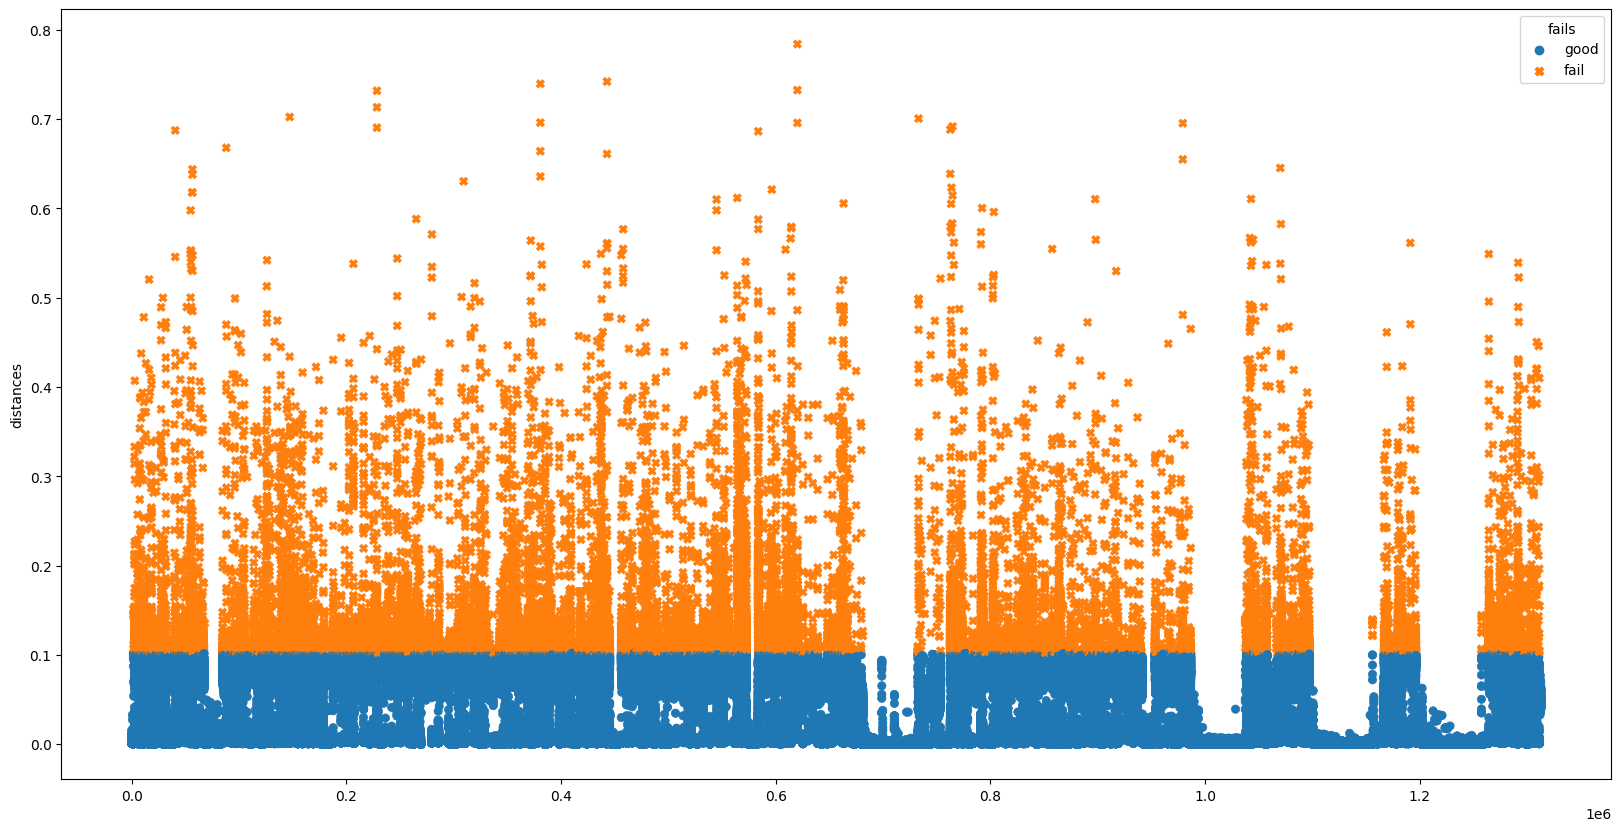

In [23]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.scatterplot(data = X_labeled, x = range(0,1312731), y = "distances", hue = "fails", style= "fails", edgecolor = None)

_____________________________________________________________________________________________________________

## Isolation Forest

In [24]:
from sklearn.ensemble import IsolationForest

Asumiendo 4% de defectuosos

In [25]:
IForest = IsolationForest(random_state=0, contamination= 0.04).fit(X)

In [26]:
import pickle

#Para guardar el modelo
IForestPickle = open('L2_IForestModel', 'wb') 
      
# source, destination 
pickle.dump(IForest, IForestPickle)  

# close the file
IForestPickle.close()
                
      
# load the model from disk
# loaded_model = pickle.load(open('knnpickle_file', 'rb'))
# result = loaded_model.predict(X_test) 

Para predecir un dato nuevo con Isolation Forest (suponiendo que llega con el mismo formato que los datos):

In [6]:
#**Formateo de la observación nueva**
test = pd.read_csv("ProdL2_202301121041.csv", sep = ";").iloc[0,:].to_frame()
test = test.transpose()
test = test.drop(columns = 'data', axis = 1) #Se quita la columna de fechas
#Se quitan las columnas descartadas en el analisis
columns = [3,17,18,19,20,21]
test = test.drop(columns=test.columns[columns], axis = 1)

# load the model from disk
ScalerLoaded = pickle.load(open('L2Scaler', 'rb'))
test = pd.DataFrame(ScalerLoaded.transform(test))
test


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.027027,0.019816,0.407407,0.003954,0.042918,0.095967,0.782609,0.072821,0.604167,1.0,...,0.255413,0.001467,0.032538,0.007194,0.001686,0.93722,0.856216,0.975253,0.719731,0.595238


In [7]:
#**Predecimos cargando el modelo**
IForestLoaded = pickle.load(open('L2_IForestModel', 'rb'))
prediction = IForestLoaded.predict(test) 
prediction

array([1])

## Fuera de rango

In [5]:
import pandas as pd
import numpy as np

Formateo de datos y eliminación de variable no relevantes

In [6]:
Prod2 = pd.read_csv("ProdL2_202301121041.csv", sep = ";")
Prod2 = Prod2.drop(columns = 'data', axis = 1)
columns = [3,17,18,19,20,21]
Prod2 = Prod2.drop(columns=Prod2.columns[columns], axis = 1)
Prod2 = Prod2.fillna(method='bfill', axis=0)
Prod2

,presion_baja_pol_puro,presion_alta_pol_mix,presion_media_pol_mix,presion_alta_iso,presion_baja_iso,presion_media_cat1,presion_baja_cat1,presion_alta_pent,presion_baja_pent,presion_baja_aditivo,...,caudal_pol_mix,caudal_iso,caudal_cat1,caudal_aditivo,caudal_pent,nivel_pol1,nivel_pol2,nivel_iso,nivel_cat1,nivel_aditivo
0,0.1,5.3,5.5,0.2,0.0,1.5,1.8,4.6,4.4,1.5,...,0.029,0.000,0.015,0.001,0.001,81.6,79.3,87.1,61.4,66.6
1,0.1,5.3,5.5,0.2,0.0,1.5,1.8,4.5,4.4,1.5,...,0.029,0.000,0.016,0.001,0.001,81.6,79.3,87.1,61.4,66.6
2,0.1,5.3,5.5,0.2,0.0,1.5,1.8,4.4,4.6,1.5,...,0.029,0.000,0.015,0.001,0.000,81.6,79.3,87.0,61.3,66.6
3,0.1,5.3,5.5,0.2,0.0,1.5,1.8,4.5,4.6,1.5,...,0.058,0.000,0.015,0.001,0.000,81.7,79.3,87.1,61.3,66.6
4,0.1,5.3,5.6,0.2,0.0,1.5,1.8,4.5,4.1,1.5,...,0.029,0.000,0.015,0.001,0.001,81.6,79.4,87.1,61.3,66.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312726,9.7,146.2,6.6,139.7,6.3,29.9,1.8,125.6,3.4,1.5,...,4.110,5.991,0.124,0.000,0.275,65.2,68.7,78.8,70.9,64.4
1312727,9.7,147.9,6.6,139.9,6.6,44.0,1.8,124.4,4.6,1.5,...,4.110,5.991,0.119,0.000,0.275,65.6,68.7,78.6,70.9,64.5
1312728,9.8,147.7,6.6,140.0,6.4,25.0,1.8,125.6,3.8,1.5,...,4.139,5.991,0.124,0.000,0.273,66.1,68.7,78.4,70.7,64.4
1312729,9.8,148.4,6.6,139.8,6.6,48.2,1.8,126.7,4.3,1.5,...,4.081,5.991,0.123,0.000,0.277,66.5,68.7,78.2,70.7,64.4


Se deja un 4% hacia arriba y hacia abajo en los intervalos

In [8]:
Intervals = {}
for i in Prod2.columns:
    Intervals[i] = (Prod2[i].quantile(0.04), Prod2[i].quantile(0.96))

Intervals

{'presion_baja_pol_puro': (0.1, 10.7),
 'presion_alta_pol_mix': (4.2, 152.1),
 'presion_media_pol_mix': (4.4, 7.8),
 'presion_alta_iso': (0.1, 154.6),
 'presion_baja_iso': (-0.1, 6.2),
 'presion_media_cat1': (-0.2, 45.3),
 'presion_baja_cat1': (0.1, 1.8),
 'presion_alta_pent': (-0.3, 131.1),
 'presion_baja_pent': (-0.1, 4.8),
 'presion_baja_aditivo': (0.4, 1.5),
 'presion_alta_aditivo': (-0.1, 38.5),
 'caudal_pol_mix': (0.029, 5.904),
 'caudal_iso': (0.0, 9.175),
 'caudal_cat1': (0.014, 0.26),
 'caudal_aditivo': (0.0, 0.08),
 'caudal_pent': (0.0, 0.43),
 'nivel_pol1': (67.2, 85.4),
 'nivel_pol2': (19.1, 85.1),
 'nivel_iso': (74.9, 82.7),
 'nivel_cat1': (61.9, 76.9),
 'nivel_aditivo': (60.6, 69.8)}

Comprobamos en una observación si alguna de sus variable se sale de los intervalos:

In [9]:
#**Formateo de la observación nueva**
test = pd.read_csv("ProdL2_202301121041.csv", sep = ";").iloc[0,:].to_frame()
test = test.transpose()
test = test.drop(columns = 'data', axis = 1) #Se quita la columna de fechas
#Se quitan las columnas descartadas en el analisis
columns = [3,17,18,19,20,21]
test = test.drop(columns=test.columns[columns], axis = 1)
test

,presion_baja_pol_puro,presion_alta_pol_mix,presion_media_pol_mix,presion_alta_iso,presion_baja_iso,presion_media_cat1,presion_baja_cat1,presion_alta_pent,presion_baja_pent,presion_baja_aditivo,...,caudal_pol_mix,caudal_iso,caudal_cat1,caudal_aditivo,caudal_pent,nivel_pol1,nivel_pol2,nivel_iso,nivel_cat1,nivel_aditivo
0,0.1,5.3,5.5,0.2,0.0,1.5,1.8,4.6,4.4,1.5,...,0.029,0.0,0.015,0.001,0.001,81.6,79.3,87.1,61.4,66.6


In [10]:
for i in test.columns:
    if (test[i][0] > Intervals[i][1]) or (test[i][0] < Intervals[i][0]):
        print("¡Atención! Fuera de rango en la variable: ",i)

¡Atención! Fuera de rango en la variable:  nivel_iso
¡Atención! Fuera de rango en la variable:  nivel_cat1
